<a href="https://colab.research.google.com/github/katuuushka/DOD/blob/main/%D0%9F%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

file_path = 'Датасет ХСН.xlsx'
data = pd.read_excel(file_path)

data = data[['ID', 'Пол', 'САД', 'Глюкоза', 'Креатинин', 'ХСН']]

data['Глюкоза'] = pd.to_numeric(data['Глюкоза'].astype(str).str.replace(',', '.'), errors='coerce')
data['Креатинин'] = pd.to_numeric(data['Креатинин'].astype(str).str.replace(',', '.'), errors='coerce')
data['Пол'] = data['Пол'].replace({'м': 0, 'ж': 1})
data = data[data['Пол'].isin([0, 1])]

data.dropna(inplace=True)

In [3]:
from sklearn.model_selection import train_test_split
X = data[['САД', 'Глюкоза', 'Креатинин']]
y = data[['ХСН']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=123)

In [4]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [5]:
from tensorflow import keras
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(3,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8192 - loss: 1.1757 - val_accuracy: 0.8661 - val_loss: 0.5405
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8206 - loss: 0.6871 - val_accuracy: 0.8929 - val_loss: 0.3771
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8701 - loss: 0.6113 - val_accuracy: 0.8929 - val_loss: 0.3094
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8491 - loss: 0.5546 - val_accuracy: 0.8839 - val_loss: 0.3272
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8262 - loss: 0.5274 - val_accuracy: 0.8929 - val_loss: 0.2978
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8383 - loss: 0.5131 - val_accuracy: 0.8929 - val_loss: 0.2784
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8047 - loss: 0.4591 - val_accuracy: 0.8929 - val_loss: 0.2549
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8790 - loss: 0.4360 - val_accuracy: 

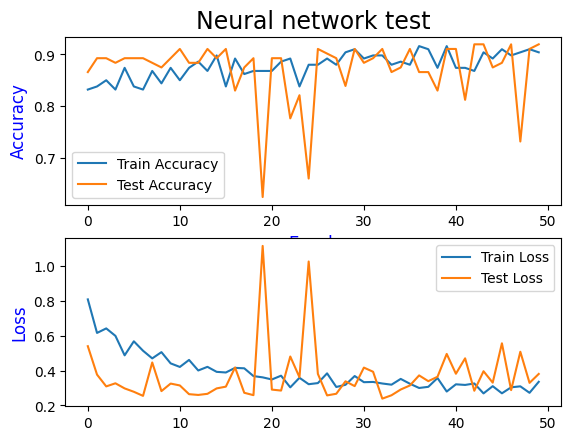

In [6]:
model_history = model.fit(X_train, train_labels, epochs=50, batch_size=1, verbose=1, validation_data=(X_test, test_labels))

plt.figure()
plt.subplot(211)
plt.title('Neural network test', fontsize=17)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch', fontsize=12, color='blue')
plt.ylabel('Accuracy', fontsize=12, color='blue')
plt.legend()
plt.subplot(212)
plt.plot(model_history.history['loss'], label='Train Loss')
plt.plot(model_history.history['val_loss'], label='Test Loss')
plt.ylabel('Loss', fontsize=12, color='blue')
plt.legend()

test_loss, test_acc = model.evaluate(X_test, test_labels)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7546 - loss: 1.7373 - val_accuracy: 0.8571 - val_loss: 0.7409
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8493 - loss: 1.1810 - val_accuracy: 0.7411 - val_loss: 1.8134
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8326 - loss: 1.0542 - val_accuracy: 0.8929 - val_loss: 0.5212
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7815 - loss: 1.3945 - val_accuracy: 0.8304 - val_loss: 1.0757
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8041 - loss: 0.9965 - val_accuracy: 0.8929 - val_loss: 0.7721
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8112 - loss: 1.1201 - val_accuracy: 0.6786 - val_loss: 1.3567
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8224 - loss: 0.7164 - val_accuracy: 0.6429 - val_loss: 1.3777
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8498 - loss: 0.5411 - val_accuracy: 0.8929 - val_

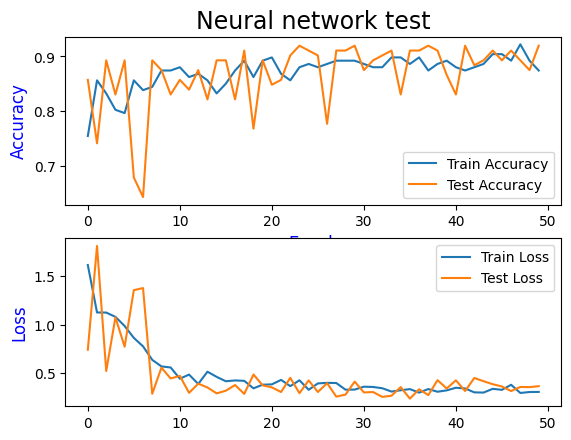

In [7]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(3,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(X_train, train_labels, epochs=50, batch_size=1, verbose=1, validation_data=(X_test, test_labels))

plt.figure()
plt.subplot(211)
plt.title('Neural network test', fontsize=17)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch', fontsize=12, color='blue')
plt.ylabel('Accuracy', fontsize=12, color='blue')
plt.legend()
plt.subplot(212)
plt.plot(model_history.history['loss'], label='Train Loss')
plt.plot(model_history.history['val_loss'], label='Test Loss')
plt.ylabel('Loss', fontsize=12, color='blue')
plt.legend()

test_loss, test_acc = model.evaluate(X_test, test_labels)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

Epoch 1/14


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9182 - loss: 0.3368 - val_accuracy: 0.9107 - val_loss: 0.2511
Epoch 2/14
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8748 - loss: 0.3089 - val_accuracy: 0.9107 - val_loss: 0.2940
Epoch 3/14
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8410 - loss: 0.5103 - val_accuracy: 0.9018 - val_loss: 0.3408
Epoch 4/14
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8487 - loss: 0.4018 - val_accuracy: 0.8839 - val_loss: 0.3256
Epoch 5/14
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9046 - loss: 0.3120 - val_accuracy: 0.8482 - val_loss: 0.3307
Epoch 6/14
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8447 - loss: 0.3645 - val_accuracy: 0.8393 - val_loss: 0.4237
Epoch 7/14
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8768 - loss: 0.3270 - val_accuracy: 0.8929 - val_loss: 0.2671
Epoch 8/14
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9284 - loss: 0.2531 - val_accuracy: 0.9018 - val_

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8909 - loss: 0.3936 
Test Accuracy:  0.9017857313156128 
Test Loss:  0.36184367537498474


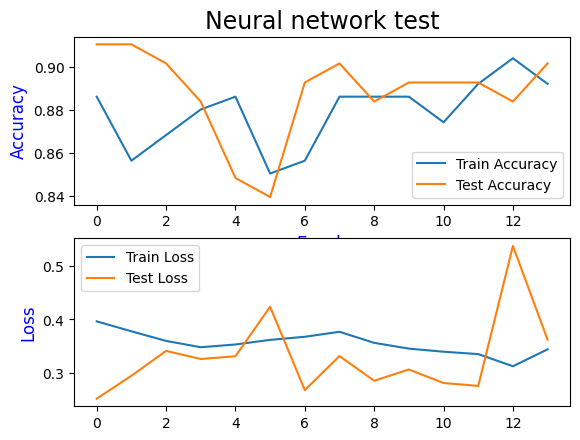

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from keras import models
from keras import layers

pd.set_option('display.max_rows', None)

file_path = 'Датасет ХСН.xlsx'
data = pd.read_excel(file_path)

data = data[['ID', 'Пол', 'САД', 'Глюкоза', 'Креатинин', 'ХСН']]

data['Глюкоза'] = pd.to_numeric(data['Глюкоза'].astype(str).str.replace(',', '.'), errors='coerce')
data['Креатинин'] = pd.to_numeric(data['Креатинин'].astype(str).str.replace(',', '.'), errors='coerce')
data['Пол'] = data['Пол'].replace({'м': 0, 'ж': 1})
data = data[data['Пол'].isin([0, 1])]

data.dropna(inplace=True)

X = data[['САД', 'Глюкоза', 'Креатинин']]
y = data[['ХСН']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=123)

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

def create_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='tanh', input_shape=(3,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

best_epochs = 14
model = create_model()
model_history = model.fit(X_train, train_labels, epochs=best_epochs, batch_size=1, verbose=1, validation_data=(X_test, test_labels))

model.save('hsn_model.h5')

plt.figure()
plt.subplot(211)
plt.title('Neural network test', fontsize=17)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch', fontsize=12, color='blue')
plt.ylabel('Accuracy', fontsize=12, color='blue')
plt.legend()
plt.subplot(212)
plt.plot(model_history.history['loss'], label='Train Loss')
plt.plot(model_history.history['val_loss'], label='Test Loss')
plt.ylabel('Loss', fontsize=12, color='blue')
plt.legend()

test_loss, test_acc = model.evaluate(X_test, test_labels)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

In [9]:
loaded_model = keras.models.load_model('hsn_model.h5')

САД = float(input("Введите САД (САД): "))
Глюкоза = float(input("Введите Глюкоза (Глюкоза): "))
Креатинин = float(input("Введите Креатинин (Креатинин): "))

input_data = np.array([[САД, Глюкоза, Креатинин]])
predicted_class = loaded_model.predict(input_data)
predicted_label = np.argmax(predicted_class)

result = data['ХСН']

if result := 1:
    print('ХСН')
else:
    print('Нет ХСН')

Введите САД (САД): 170.0
Введите Глюкоза (Глюкоза): 5.05
Введите Креатинин (Креатинин): 114.3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
ХСН


In [14]:
pip install streamlit tensorflow pandas numpy

  Using cached streamlit-1.43.2-py2.py3-none-any.whl.metadata (8.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.9 MB/s eta 0:00:00


In [15]:
import streamlit as st
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Загрузка обученной модели
try:
    model = load_model('hsn_model.h5')
except FileNotFoundError:
    st.error("Модель 'hsn_model.h5' не найдена. Пожалуйста, убедитесь, что файл находится в правильном каталоге.")
    st.stop()

# Функция для предсказания ХСН
def predict_hsn(sad, glucose, creatinine):
    """
    Предсказывает наличие ХСН на основе введенных данных.

    Args:
        sad (float): Показатель САД.
        glucose (float): Уровень глюкозы.
        creatinine (float): Уровень креатинина.

    Returns:
        int: 1, если есть ХСН, 0, если нет.
    """
    input_data = pd.DataFrame([[sad, glucose, creatinine]], columns=['САД', 'Глюкоза', 'Креатинин'])
    prediction = model.predict(input_data)
    return int(np.round(prediction[0][0]))  # Возвращаем 0 или 1

# Настройка Streamlit
st.title("Чат с Анализатором ХСН")

# Инициализация истории чата в Session State (если еще не существует)
if 'chat_history' not in st.session_state:
    st.session_state.chat_history = []

# Функция для отображения истории чата
def display_chat_history():
    for message in st.session_state.chat_history:
        with st.chat_message(message["role"]):
            st.markdown(message["content"])

# Отображаем историю чата при каждом обновлении страницы
display_chat_history()


# Функция для получения ответа от Анализатора
def get_analyzer_response(sad, glucose, creatinine):
    try:
        prediction = predict_hsn(sad, glucose, creatinine)
        if prediction == 1:
            response = "Похоже, что у вас есть признаки ХСН.  Рекомендуется обратиться к врачу для дальнейшей диагностики и лечения."
        else:
            response = "Судя по введенным данным, признаков ХСН не выявлено.  Однако, для полной уверенности рекомендуется проконсультироваться с врачом."
        return response
    except Exception as e:
        return f"Произошла ошибка при анализе данных: {e}. Пожалуйста, убедитесь, что введены корректные числовые значения."


# Ввод данных пользователем
with st.sidebar:
    st.header("Введите данные пациента")
    sad = st.number_input("САД (систолическое артериальное давление):", min_value=0.0, value=120.0)
    glucose = st.number_input("Уровень глюкозы:", min_value=0.0, value=80.0)
    creatinine = st.number_input("Уровень креатинина:", min_value=0.0, value=1.0)

# Логика чата
if prompt := st.chat_input("Введите 'Анализировать' для получения результата"):
    # Добавляем сообщение пользователя в историю чата
    st.session_state.chat_history.append({"role": "user", "content": prompt})
    with st.chat_message("user"):
        st.markdown(prompt)

    # Проверяем, что пользователь хочет проанализировать данные
    if prompt.lower() == "анализировать":
        # Получаем ответ от Анализатора
        analyzer_response = get_analyzer_response(sad, glucose, creatinine)

        # Добавляем сообщение Анализатора в историю чата
        st.session_state.chat_history.append({"role": "assistant", "content": analyzer_response})
        with st.chat_message("assistant"):
            st.markdown(analyzer_response)
    else:
        # Если пользователь ввел что-то другое, предлагаем ввести "Анализировать"
        response_text = "Пожалуйста, введите 'Анализировать' для получения результата."
        st.session_state.chat_history.append({"role": "assistant", "content": response_text})
        with st.chat_message("assistant"):
            st.markdown(response_text)


# Дополнительные инструкции и дисклеймер
st.markdown("---")
st.markdown("⚠️ **Внимание:** Этот инструмент предназначен только для информационных целей и не является заменой консультации с квалифицированным врачом. Результаты анализа не являются диагнозом и не должны использоваться для самостоятельного лечения. Всегда обращайтесь к врачу для получения профессиональной медицинской помощи.")

2025-03-18 00:15:22.580 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 00:15:22.715 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-18 00:15:22.716 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 00:15:22.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 00:15:22.722 Session state does not function when running a script without `streamlit run`
2025-03-18 00:15:22.723 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 00:15:22.725 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-18 00:15:22.727 Thread 'MainThread': missing ScriptRunContext! 

DeltaGenerator()

In [21]:
%%writefile hsn_analyzer.py
import streamlit as st
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

# Загрузка обученной модели
try:
    model = load_model('hsn_model.h5')
except FileNotFoundError:
    st.error("Модель 'hsn_model.h5' не найдена. Пожалуйста, убедитесь, что файл находится в правильном каталоге.")
    st.stop()

# Функция для предсказания ХСН
def predict_hsn(sad, glucose, creatinine):
    """
    Предсказывает наличие ХСН на основе введенных данных.

    Args:
        sad (float): Показатель САД.
        glucose (float): Уровень глюкозы.
        creatinine (float): Уровень креатинина.

    Returns:
        int: 1, если есть ХСН, 0, если нет.
    """
    input_data = pd.DataFrame([[sad, glucose, creatinine]], columns=['САД', 'Глюкоза', 'Креатинин'])
    prediction = model.predict(input_data)
    return int(np.round(prediction[0][0]))  # Возвращаем 0 или 1

# Настройка Streamlit
st.title("Чат с Анализатором ХСН")

# Инициализация истории чата в Session State (если еще не существует)
if 'chat_history' not in st.session_state:
    st.session_state.chat_history = []

# Функция для отображения истории чата
def display_chat_history():
    for message in st.session_state.chat_history:
        with st.chat_message(message["role"]):
            st.markdown(message["content"])

# Отображаем историю чата при каждом обновлении страницы
display_chat_history()


# Функция для получения ответа от Анализатора
def get_analyzer_response(sad, glucose, creatinine):
    try:
        prediction = predict_hsn(sad, glucose, creatinine)
        if prediction == 1:
            response = "Похоже, что у вас есть признаки ХСН.  Рекомендуется обратиться к врачу для дальнейшей диагностики и лечения."
        else:
            response = "Судя по введенным данным, признаков ХСН не выявлено.  Однако, для полной уверенности рекомендуется проконсультироваться с врачом."
        return response
    except Exception as e:
        return f"Произошла ошибка при анализе данных: {e}. Пожалуйста, убедитесь, что введены корректные числовые значения."


# Ввод данных пользователем
with st.sidebar:
    st.header("Введите данные пациента")
    sad = st.number_input("САД (систолическое артериальное давление):", min_value=0.0, value=120.0)
    glucose = st.number_input("Уровень глюкозы:", min_value=0.0, value=80.0)
    creatinine = st.number_input("Уровень креатинина:", min_value=0.0, value=1.0)

# Логика чата
if prompt := st.chat_input("Введите 'Анализировать' для получения результата"):
    # Добавляем сообщение пользователя в историю чата
    st.session_state.chat_history.append({"role": "user", "content": prompt})
    with st.chat_message("user"):
        st.markdown(prompt)

    # Проверяем, что пользователь хочет проанализировать данные
    if prompt.lower() == "анализировать":
        # Получаем ответ от Анализатора
        analyzer_response = get_analyzer_response(sad, glucose, creatinine)

        # Добавляем сообщение Анализатора в историю чата
        st.session_state.chat_history.append({"role": "assistant", "content": analyzer_response})
        with st.chat_message("assistant"):
            st.markdown(analyzer_response)
    else:
        # Если пользователь ввел что-то другое, предлагаем ввести "Анализировать"
        response_text = "Пожалуйста, введите 'Анализировать' для получения результата."
        st.session_state.chat_history.append({"role": "assistant", "content": response_text})
        with st.chat_message("assistant"):
            st.markdown(response_text)


# Дополнительные инструкции и дисклеймер
st.markdown("---")
st.markdown("⚠️ **Внимание:** Этот инструмент предназначен только для информационных целей и не является заменой консультации с квалифицированным врачом. Результаты анализа не являются диагнозом и не должны использоваться для самостоятельного лечения. Всегда обращайтесь к врачу для получения профессиональной медицинской помощи.")

Overwriting hsn_analyzer.py
